# Регрессия - моя профессия




Сегодня мы попробуем построить модель линейной регрессии для цен на квартиры. 

## 1. Предобработка данных 

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
df = pd.read_csv('flat.csv', sep='\t', index_col='n')
print('Размер выборки:', df.shape)
df.head( )

Размер выборки: (2040, 10)


,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
n,,,,,,,,,,
1,81,58,40,6.0,12.5,7,1,1,1,3
2,75,44,28,6.0,13.5,7,1,0,1,6
3,128,70,42,6.0,14.5,3,1,1,1,3
4,95,61,37,6.0,13.5,7,1,0,1,1
5,330,104,60,11.0,10.5,7,0,1,1,3


__Описание переменных:__

```
n – номер квартиры по порядку
price – цена квартиры в $1000
totsp – общая площадь квартиры, кв.м.
livesp жилая площадь квартиры, кв.м.
kitsp – площадь кухни, кв.м.
dist – расстояние от центра в км.
metrdist – расстояние до метро в минутах
walk – 1 – пешком от метро, 0 – на транспорте
brick 1 – кирпичный, монолит ж/б, 0 – другой
floor 1 – этаж кроме первого и последнего, 0 – иначе.
code – число от 1 до 8, при помощи которого мы группируем наблюдения по
подвыборкам:
1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии
метрополитена
2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена
3. Северо-запад, вокруг Замоскворецкой линии метрополитена
4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена
5. Юго-восток, вокруг Люблинской линии метрополитена
6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена
7. Восток, вокруг Калиниской линии метрополитена
8. Восток, вокруг Арбатско-Покровской линии метрополитена
```


Какие переменный категориальные? Какие непрерывные?

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 1 to 2040
Data columns (total 10 columns):
price       2040 non-null int64
totsp       2040 non-null int64
livesp      2040 non-null int64
kitsp       2040 non-null float64
dist        2040 non-null float64
metrdist    2040 non-null int64
walk        2040 non-null int64
brick       2040 non-null int64
floor       2040 non-null int64
code        2040 non-null int64
dtypes: float64(2), int64(8)
memory usage: 175.3 KB


Пропуски в данных:

In [100]:
df.isnull().sum()

price       0
totsp       0
livesp      0
kitsp       0
dist        0
metrdist    0
walk        0
brick       0
floor       0
code        0
dtype: int64

Вот так выглядит распределение цен в выборке:

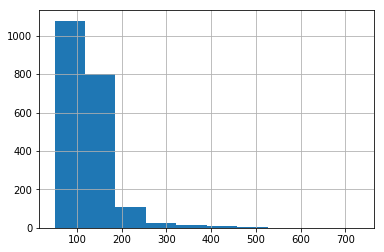

In [101]:
df.price.hist()

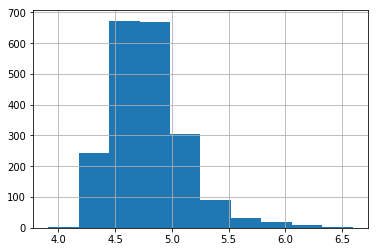

In [102]:
df['price'] = np.log(df['price'])
df.price.hist()

Предобработка категориальных переменных. Как и зачем, ищи подробное описание в блокноте про Титаник. 

In [103]:
# Сделали OHE для категориальной переменной
df_categor = pd.get_dummies(df['code'], dummy_na=True, drop_first=True, prefix='code')

# Объединили назад наши таблички
df = pd.concat([df.drop('code',axis=1),df_categor], axis=1)
df.head()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code_2.0,code_3.0,code_4.0,code_5.0,code_6.0,code_7.0,code_8.0,code_nan
n,,,,,,,,,,,,,,,,,
1,4.394449,58,40,6.0,12.5,7,1,1,1,0,1,0,0,0,0,0,0
2,4.317488,44,28,6.0,13.5,7,1,0,1,0,0,0,0,1,0,0,0
3,4.852030,70,42,6.0,14.5,3,1,1,1,0,1,0,0,0,0,0,0
4,4.553877,61,37,6.0,13.5,7,1,0,1,0,0,0,0,0,0,0,0
5,5.799093,104,60,11.0,10.5,7,0,1,1,0,1,0,0,0,0,0,0


Делим данные на тренировочные и тестовые!

In [104]:
from sklearn import cross_validation
df_train, df_test = cross_validation.train_test_split(df, test_size = 0.3)

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_train[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [106]:
df_train_scale = scaler.transform(df_train[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']])
df_test_scale = scaler.transform(df_test[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']])

In [107]:
df_train[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']] = df_train_scale
df_test[['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']] = df_test_scale

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [108]:
df_train.head()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code_2.0,code_3.0,code_4.0,code_5.0,code_6.0,code_7.0,code_8.0,code_nan
n,,,,,,,,,,,,,,,,,
289,4.317488,-1.461814,-1.556991,-1.024731,-0.600025,-0.849738,0,0,0,0,0,1,0,0,0,0,0
1869,4.844187,0.240187,1.022639,-1.024731,-0.600025,-0.849738,0,0,0,0,0,1,0,0,0,0,0
961,4.406719,-0.168293,-0.783102,-0.293621,1.784710,-0.320897,0,0,1,1,0,0,0,0,0,0,0
1100,4.941642,-0.372533,-0.009213,-0.293621,-0.898117,-0.849738,1,0,0,0,0,0,0,0,0,0,0
27,4.905275,0.648667,-0.009213,1.534152,0.294251,-0.849738,1,0,1,0,0,0,1,0,0,0,0


In [109]:
print(df_train.shape)
print(df_test.shape)

(1428, 17)
(612, 17)


In [110]:
# Вытаскиваем цены и параметры квартир по разным переменным для удобства 

y_train = df_train.price 
y_test = df_test.price 

X_train = df_train.drop('price', axis=1).get_values()
X_test = df_test.drop('price', axis=1).get_values()

## 2. Константный прогноз 

In [111]:
y_mean = np.mean(y_train)
y_pred_naive = np.ones(len(y_test)) * y_mean
y_pred_naive[:5]

array([4.78263266, 4.78263266, 4.78263266, 4.78263266, 4.78263266])

## 3. Метрики качества для регрессии 

In [112]:
from sklearn import metrics

In [113]:
metrics.mean_absolute_error(y_test, y_pred_naive)

0.2506386353165255

In [114]:
metrics.mean_squared_error(y_test, y_pred_naive)

0.10936641859793735

In [115]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred_naive))

0.33070593976815316

In [116]:
metrics.r2_score(y_test, y_pred_naive)

-0.007825223725317354

In [117]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    pass

## 3. Строим нашу первую регрессию!

In [118]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [119]:
print_metrics(y_test,y_pred_regr)

MAE: 0.1085584478597757
RMSE: 0.14498145806020413
R2: 0.8063015438664323


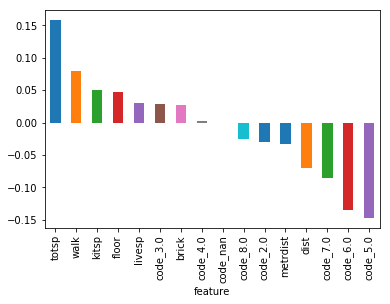

In [120]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

## 4. Строим Lasso-регрессию 

In [121]:
from sklearn.linear_model import Lasso

# Объявили модель
model_simplelasso = Lasso()

# Обучили модель на тренировочной выборке 
model_simplelasso.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_lasso = model_simplelasso.predict(X_test)

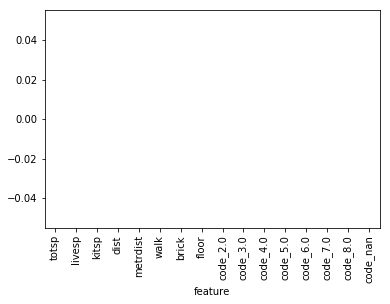

In [122]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": model_simplelasso.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

In [123]:
print_metrics(y_test,y_pred_lasso)

MAE: 0.2506386353165255
RMSE: 0.33070593976815316
R2: -0.007825223725317354


## 5. Подбор гиперпараметра для Lasso-регрессии

In [124]:
from sklearn.grid_search import GridSearchCV

# Решётака для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

model_lasso = Lasso() 

grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


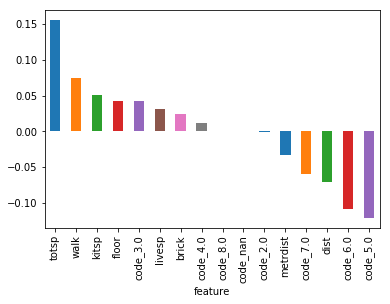

In [125]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

In [126]:
print_metrics(y_test,y_pred_lasso)

MAE: 0.1095100701622929
RMSE: 0.1458582680363495
R2: 0.8039515840151437


## 6. Случайный лес

In [132]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train, y_train)

y_pred_forest = rf.predict(X_test)

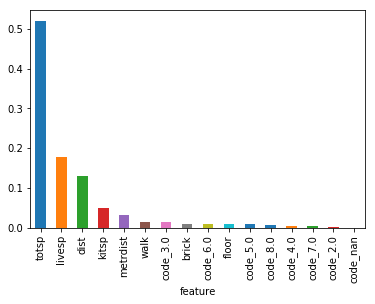

In [134]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": rf.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

## 7. Сравниваем модели между собой 

In [135]:
print_metrics(y_test,y_pred_naive)

MAE: 0.2506386353165255
RMSE: 0.33070593976815316
R2: -0.007825223725317354


In [136]:
print_metrics(y_test,y_pred_regr)

MAE: 0.1085584478597757
RMSE: 0.14498145806020413
R2: 0.8063015438664323


In [137]:
print_metrics(y_test,y_pred_lasso)

MAE: 0.1095100701622929
RMSE: 0.1458582680363495
R2: 0.8039515840151437


In [138]:
print_metrics(y_test,y_pred_forest)

MAE: 0.10350665088948258
RMSE: 0.14624161252475498
R2: 0.802919721500071


Text(0,0.5,'Estimated quality')

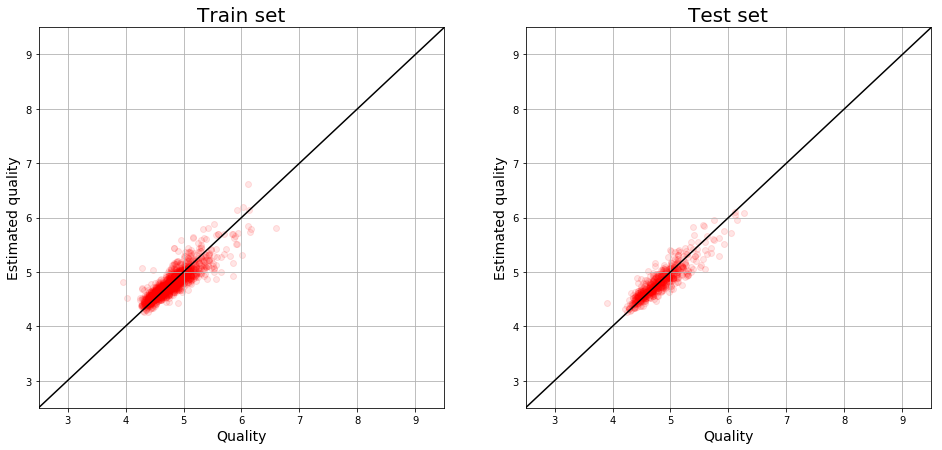

In [146]:
plt.figure(figsize=(16,7))
plt.subplot(121)
plt.scatter(y_train, model_regression.predict(X_train), color="red", alpha=0.1)
plt.xlim(2.5,9.5)
plt.ylim(2.5,9.5)
plt.plot(range(11), color='black')
plt.grid()
plt.title('Train set', fontsize=20)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
plt.scatter(y_test, model_regression.predict(X_test), color="red", alpha=0.1)
plt.xlim(2.5,9.5)
plt.ylim(2.5,9.5)
plt.plot(range(11), color='black')
plt.grid()
plt.title('Test set', fontsize=20)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Estimated quality', fontsize=14)

Text(0,0.5,'Estimated quality')

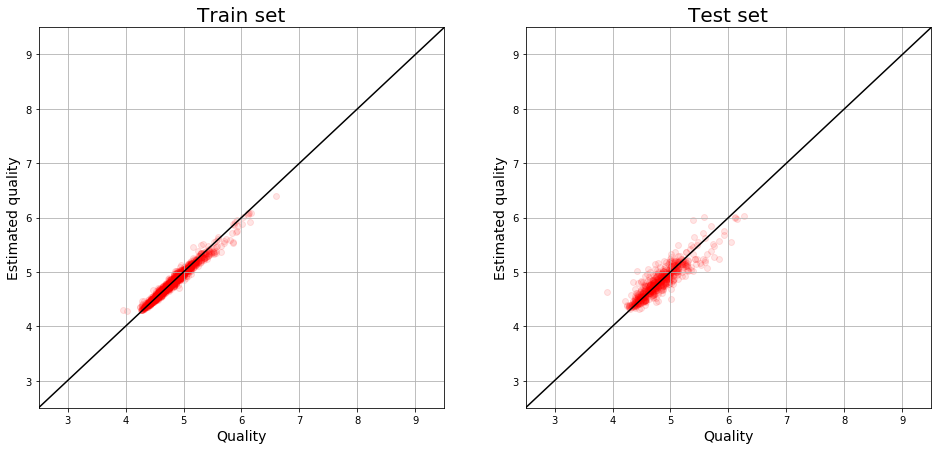

In [145]:
plt.figure(figsize=(16,7))
plt.subplot(121)
plt.scatter(y_train, rf.predict(X_train), color="red", alpha=0.1)
plt.xlim(2.5,9.5)
plt.ylim(2.5,9.5)
plt.plot(range(11), color='black')
plt.grid()
plt.title('Train set', fontsize=20)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
plt.scatter(y_test, rf.predict(X_test), color="red", alpha=0.1)
plt.xlim(2.5,9.5)
plt.ylim(2.5,9.5)
plt.plot(range(11), color='black')
plt.grid()
plt.title('Test set', fontsize=20)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Estimated quality', fontsize=14)

Чтобы формализовать слова-пожелание "наилучшим образом", ввели метрики качества регрессии. 


Их несколько, рассмотрим некоторые:

MSE (*mean squared error*)


$$ MSE = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$


MAE (*mean absolute error*)

$$ MAE = \frac{1}{N}\sum_{i=1}^{N} |y_i - \hat{y}_i| $$

$R^2$ - коэффициент детерминации

$$ R^2 =1- \frac{ \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2}{ \frac{1}{N}\sum_{i=1}^{N} (y_i - \bar{y}_i)^2} $$


Оптимизация метрик качества и позволяет получить оценку параметров линейной регрессии.

